# Fitting a function to histogram

In the exercise we will make a Breit-Wigner fit to invariant mass histogram. With the fitted Breit-Wigner function it will be possible to determine the mass and the lifetime of a Z boson.

In high-energy physics, a common distribution function used to describe the distribution of invariant masses is the relativistic Breit-Wigner function that writes as:

$$
f(E) = \frac{K}{(E^2-M^2)^2 + M^2 \Gamma^2},
$$

where $E$ is the energy, $M$ the maximum of the distribution (equals to the mass of the particle that is detected in the resonance), $\Gamma$ the full width at half maximum (FWHM) or the decay width of the distribution and $K$ a constant that can be expressed as:

$$
K = \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}}
$$

The decay width $\Gamma$ and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant.

If we also want to include the background events to the fit, we must add additional parameters $a$, $b$ and $A$ to the distribution function. Together with the background event parameters, the distribution function becomes

$$
f(E) = aE+b+A\frac{K}{(E^2-M^2)^2 + M^2 \Gamma^2},
$$

By using curve_fit method from scipy-module, we can find optimal parameters for Breit-Wigner distribution to obtain best fit for our histogram. Your task is to fit the Breit-Wigner distribution to the invariant mass histogram for invariant mass range of (70 GeV, 110 GeV).

## Part 1: Invariant mass histogram and bin centers

In this exercise, we will use the same dataset "DoubleMuRun2011A.csv" from previous weeks. First, plot a histogram of the invariant masses in the dataset. Limit your plot to invariant mass range from 70 to 110 GeV. Use 100 bins and save the bin heights and locations to variables (see https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html for more information of the return values).

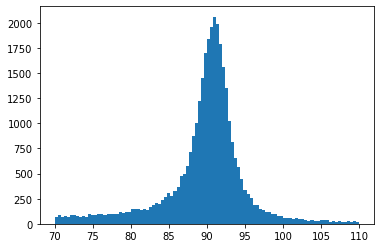

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nbins = 100
data = pd.read_csv("DoubleMuRun2011A.csv")
heights, bins, patches = plt.hist(data.M, bins=nbins, range=(70,110))
plt.show()

In general, when we want to fit a function to a histogram, we want to use the bin centers as our x-axis data values. However, the plt.hist() function returns the locations of the left edges of bins. Therefore, we need a function that converts the locations of bin edges to bin centers to make the fit more accurate.

<h3>Function that returns the bin centers</h3><p><br></p><p>Write a python function <b>bin_centers( bins )</b> that takes a list of bin edges as argument and <b>returns the bin centers</b>.<br><p>
    
Then save the bin centers of your histogram to a variable. Return your code for bin_centers -function to Moodle.

In [75]:
# possible solution

def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")
        
bins = bin_centers(bins)

In [78]:
# TESTS FOR CODERUNNER

# test1, evenly spaced positive values
bins_test1 = [0, 1, 2, 3, 4, 5]
print(bin_centers(bins_test1))
# expected output: [0.5, 1.5, 2.5, 3.5, 4.5]

# test2, evenly spaced mixed values
bins_test2 = [-10, -6, -2, 2, 6, 10]
print(bin_centers(bins_test2))
# expected output: [-8.0, -4.0, 0.0, 4.0, 8.0]

# test3, real data
import numpy as np
import pandas as pd
data = pd.read_csv('DoubleMuRun2011A.csv')
data_filtered = data[(data.M <= 100) & (data.M >= 80)]
inv_mass = data_filtered.M
histtest, binstest3 = np.histogram(inv_mass,bins=10)
print(bin_centers(binstest3))
# expected output: [81.001835, 83.001505, 85.00117499999999, 87.000845, 89.00051500000001, 91.000185, 92.999855, 94.999525, 96.999195, 98.998865]

# test4, unevenly spaces values (optional test, fails will most likely be here)
bins_test5 = [0,1,3,9,21,52]
print(bin_centers(bins_test5))
# expected output: [0.5, 2.0, 6.0, 15.0, 36.5]

# other optional tests: empty list, list with only 1 element (use this if you want to be mean)

[0.5, 1.5, 2.5, 3.5, 4.5]
[-8.0, -4.0, 0.0, 4.0, 8.0]
[81.001835, 83.001505, 85.00117499999999, 87.000845, 89.00051500000001, 91.000185, 92.999855, 94.999525, 96.999195, 98.998865]
[0.5, 2.0, 6.0, 15.0, 36.5]


## Part 2 - Breit-Wigner distribution function

Now before we can fit Breit-Wigner distribution to our histogram, we need to actually define the distribution function.

Define a function **breitwigner( E, gamma, M, a, b, A )** that **returns the Breit-Wigner distribution function** and also takes into account the **background events**. Return your code to Moodle.

In [76]:
# possible solution

def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

In [31]:
# TESTS FOR CODERUNNER

# test1: a=b=0, A=1:
print("{0:.3f} {1:.3f} {2:.3f}".format(breitwigner(1,1,1,0,0,1),breitwigner(0,1,1,0,0,1),breitwigner(0,0,1,0,0,1)))
# expected output: 0.819 0.410 0.000

# test2: a=b=A=1:
print("{0:.3f} {1:.3f} {2:.3f}".format(breitwigner(1,1,1,1,1,1),breitwigner(0,1,1,1,1,1),breitwigner(0,0,1,1,1,1)))
# expected output: 2.819 1.410 1.000

# test3: real fit parameters for "DoubleMuRun2011A.csv" between 70-110 GeV and using E=M.
print("{0:.3f}".format(breitwigner(90.877, 4.233, 90.877, -2.131, 199.980, 13830.258)))
# expected output: 2088.006

0.819 0.410 0.000
2.819 1.410 1.000
2088.006


## Part 3 - Fitting Breit-Wigner distribution to histogram

Finally, it is time to fit the distribution function to our histogram. Use **curve_fit()**-function from scipy.optimize module and find the optimal parameters for the Breit-Wigner distribution. Note that you need some initial guess to get any reasonable optimized parameters from curve_fit function. For the background parameters, you can use for example the following guesses: $a=-1$, $b=100$ and $A=10000$. You can increase the accuracy of the optimization by iterating the process and using the optimized coefficients from previous iteration as your initial guess.

Once you have the optimized parameters, plot the distribution and your histogram to confirm that the fit is good. If the doesn't seem to describe the histogram well, try using different initial guess. Print the parameters and their errors ( np.sqrt(np.diag(covariance)), where covariance is returned by curve_fit -function ).

gamma = 4.233 +/- 0.053
M     = 90.877 +/- 0.016
a     = -2.131 +/- 0.272
b     = 199.980 +/- 24.776
A     = 13830.258 +/- 143.999


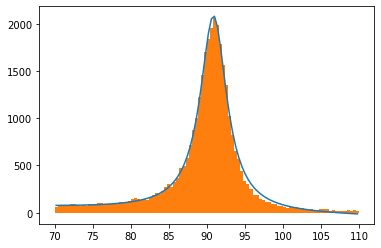

In [77]:
from scipy.optimize import curve_fit

accuracy = 1e-5
p0 = [5, 90, -1, 100, 10000]
while True: # Loop until desired accuracy
    best, covariance = curve_fit(breitwigner, bins, heights, p0=p0)
    error = max(abs(p0-best))
    if error < accuracy: 
        break
    p0 = best
    
plt.plot(bins, breitwigner(np.array(bins), *best))
plt.hist(data.M, bins=nbins, range=(70,110))
errors = np.sqrt(np.diag(covariance))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best[i],errors[i],param_strings[i]))
plt.show()

## Part 4 - Analysing the fit

Calculate the lifetime of Z-boson based on the results you obtained in part 3. Answer the questions on Moodle based on your results from parts 3 and 4.

In [86]:
# lifetime
hbar = 6.58212e-25 # GeV*s
gamma = best[0]
errgamma = errors[0]
tau = hbar/gamma
error = max(hbar/(gamma-errgamma)-tau,tau-hbar/(gamma+errgamma))

print("tau = {0:.5E} s +/- {1:.5E} s".format(tau,error))

tau = 1.55508E-25 s +/- 1.95864E-27 s


Moodle questions:

in question 1 and 2 the dataset can be changed to get slightly different results.

1. What is the decay width of Z-boson when fitting Breit-Wigner distribution to invariant mass histogram (using 100 bins) where $70 GeV < M_{inv} < 110 GeV$ and data is from file "DoubleMuRun2011A.csv".
    1. 4.2 GeV
    1. 0.26 GeV
    1. 2.5 GeV
    1. 6.8 GeV

1. What is the lifetime of Z-boson when fitting Breit-Wigner distribution to invariant mass histogram (using 100 bins) where $70 GeV < M_{inv} < 110 GeV$ and data is from file "DoubleMuRun2011A.csv".
    1. 1.6E-25 s
    1. 2.4E-24 s
    1. 3.0E-25 s
    1. 9.7E-26 s